In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [2]:
!git clone https://github.com/VinaySingh561/Time-Series-Analysis_by_ritivik_math.git

Cloning into 'Time-Series-Analysis_by_ritivik_math'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 66 (delta 20), reused 13 (delta 13), pack-reused 43 (from 1)
Receiving objects: 100% (66/66), 2.48 MiB | 28.49 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [3]:
df_ice_cream = pd.read_csv("/content/Time-Series-Analysis_by_ritivik_math/ice_cream.csv")

In [4]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [6]:
df_ice_cream.rename(columns={"DATE":"Date", "IPN31152N":"Production"}, inplace=True)

In [7]:
df_ice_cream.head()

,Date,Production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [8]:
df_ice_cream['Date'] = pd.to_datetime(df_ice_cream['Date'])

In [9]:
df_ice_cream.set_index('Date',inplace= True)

In [10]:
df_ice_cream.head()

,Production
Date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [11]:
start_date = pd.to_datetime("2010-01-01")
df_ice_cream = df_ice_cream[start_date:]

In [12]:
df_ice_cream.head()

,Production
Date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


In [18]:
df_ice_cream.shape

(121, 1)

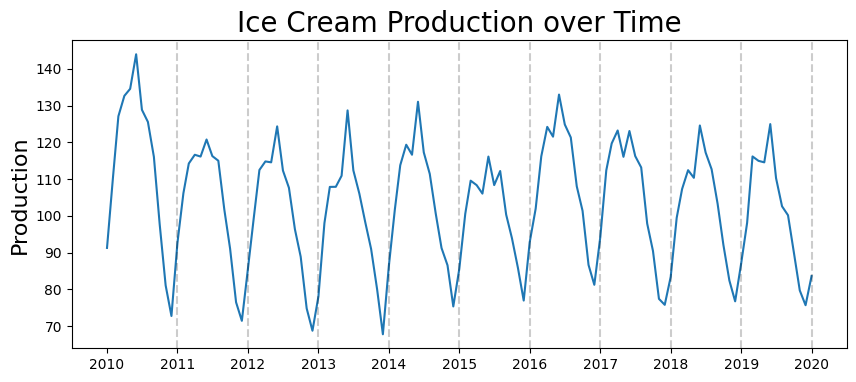

In [14]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.Production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

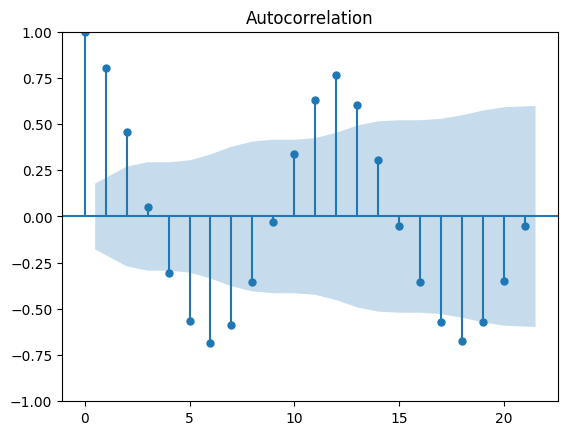

In [19]:
acf_plot = plot_acf(df_ice_cream.Production)

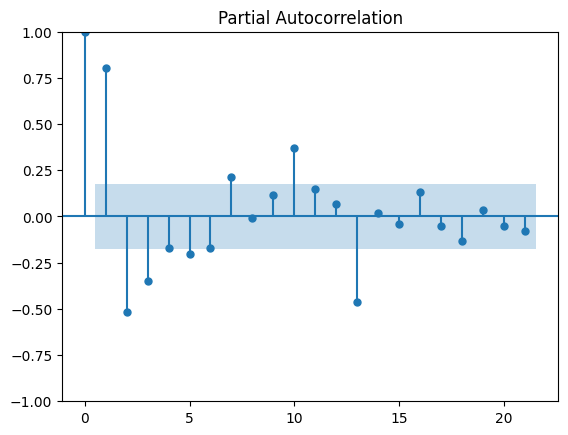

In [20]:
pacf_plot = plot_pacf(df_ice_cream.Production)

## On Stock data

In [45]:
import yfinance as yf
import datetime
import pandas as pd # Ensure pandas is imported

# Change the ticker symbol to the correct one for NIFTY50 on Yahoo Finance
tickerSymbol = 'TSLA'
tickerData = yf.Ticker(tickerSymbol)

# Get today's date in the required format
today_date = datetime.date.today().strftime('%Y-%m-%d')

# Use today's date string in the history function
tickerDf = tickerData.history(period='1d', start='2020-01-01', end=today_date) # Corrected start date format

tickerDf = tickerDf[['Close']]

# Convert the index to just display the date
tickerDf.index = tickerDf.index.date

tickerDf.head()

,Close
2020-01-02,28.684000
2020-01-03,29.534000
2020-01-06,30.102667
2020-01-07,31.270666
2020-01-08,32.809334


In [46]:
tickerDf.tail()

,Close
2025-06-09,308.579987
2025-06-10,326.089996
2025-06-11,326.429993
2025-06-12,319.109985
2025-06-13,325.309998


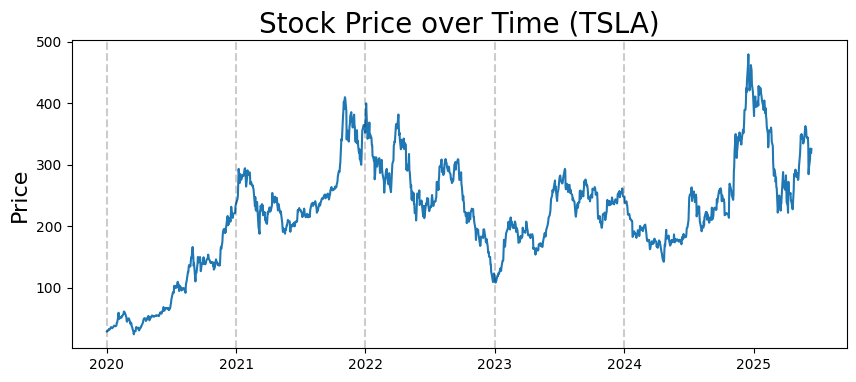

In [47]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2020,2025):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [48]:
first_diffs = tickerDf.Close.values[1:]- tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs,[0]])

In [49]:
tickerDf["FirstDiff"] = first_diffs

In [50]:
tickerDf.head()

,Close,FirstDiff
2020-01-02,28.684000,0.850000
2020-01-03,29.534000,0.568666
2020-01-06,30.102667,1.167999
2020-01-07,31.270666,1.538668
2020-01-08,32.809334,-0.720001


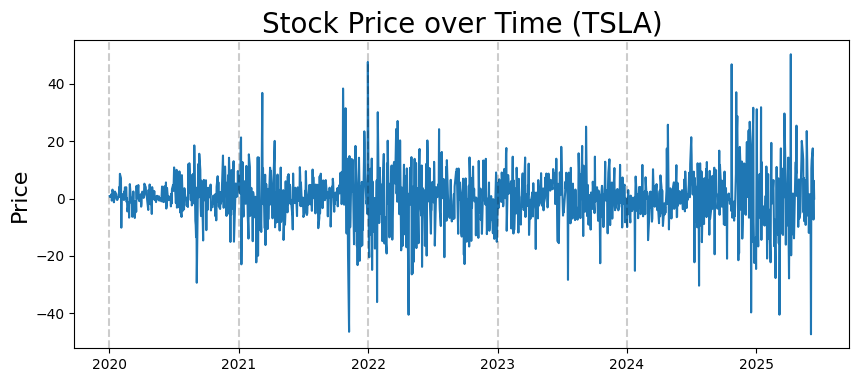

In [51]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDiff)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2020,2025):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

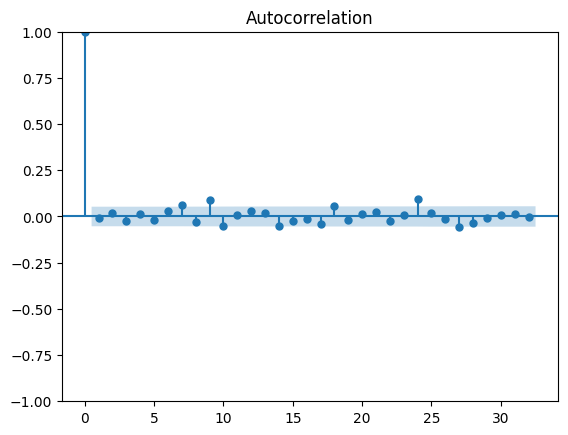

In [52]:
acf_plot = plot_acf(tickerDf.FirstDiff)

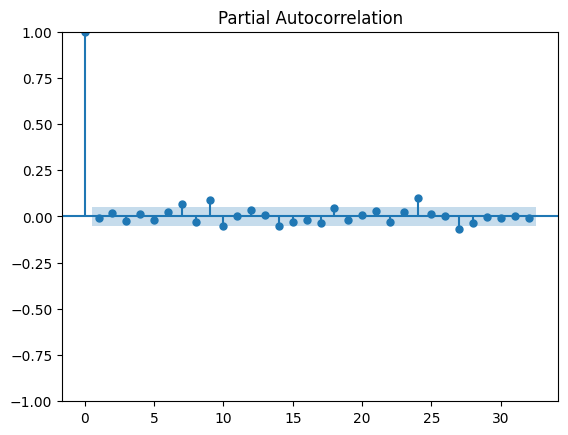

In [53]:
pacf_plot = plot_pacf(tickerDf.FirstDiff)